<a href="https://colab.research.google.com/github/francescovenco000004/peersv02/blob/main/peers_synthetic_training_nlp_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
# Change to the project directory
project_path = '/content/drive/My Drive/peers_synthetic/train'
os.chdir(project_path)

# Verify the current working directory
print("Current Working Directory: ", os.getcwd())
import sys

sys.path.append(project_path)

# Verify that the project path is in the Python path
print("Python Path: ", sys.path)


Current Working Directory:  /content/drive/My Drive/peers_synthetic/train
Python Path:  ['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython', '/content/drive/My Drive/peers_synthetic/train']


In [ ]:
import os



# List files in the directory
files = os.listdir(project_path)
print("Files in directory:")
for file in files:
    print(file)

Files in directory:
training_data;syntheticv1.csv
training data - training data NLP.csv


In [ ]:
#import dependencies
import pandas as pd
#mount onto drive
df = pd.read_csv('training data - training data NLP.csv')
print(df.head())

            id  product similarity  v-focus similarity  cust-base similarity  \
0       Mysugr            0.307085            0.382746              0.308310   
1    Healthily            0.272397            0.332723              0.284099   
2  Tele Clinic            0.823236            0.421243              0.684022   
3       Practo            0.358675            0.847312              0.541730   
4        Urban            0.345329            0.193265              0.631716   

   overall similarity (result)  
0                          0.3  
1                          0.5  
2                          0.8  
3                          0.9  
4                          0.2  


In [ ]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()
print("Columns after stripping whitespace:", df.columns)

# Drop the 'id' column and target column from features
X = df.drop(columns=['overall similarity (result)', 'id'])  # Drop 'id' and target column
# Set the target variable
y = df['overall similarity (result)']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

# Verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Columns after stripping whitespace: Index(['id', 'product similarity', 'v-focus similarity',
       'cust-base similarity', 'overall similarity (result)'],
      dtype='object')
X_train shape: (56, 3)
X_test shape: (15, 3)
y_train shape: (56,)
y_test shape: (15,)


In [ ]:
#build pipeline
!pip install category_encoders
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor  # Replace XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBRegressor(random_state=8))  # Use XGBRegressor
]
pipe = Pipeline(steps=estimators)
pipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=8, ...))])

In [ ]:
# Install scikit-optimize
!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the search space with narrower ranges and increased granularity
search_space = {
    'clf__max_depth': Integer(2, 6),  # Smaller range for max depth
    'clf__learning_rate': Real(0.01, 0.3, prior='uniform'),  # Narrow range
    'clf__subsample': Real(0.6, 0.9),  # Narrower range
    'clf__colsample_bytree': Real(0.6, 0.9),  # Narrower range
    'clf__colsample_bylevel': Real(0.6, 0.9),  # Narrower range
    'clf__colsample_bynode': Real(0.6, 0.9),  # Narrower range
    'clf__reg_alpha': Real(0.0, 5.0),  # Smaller range
    'clf__reg_lambda': Real(0.0, 5.0),  # Smaller range
    'clf__gamma': Real(0.0, 5.0)  # Smaller range
}

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBRegressor(random_state=8))
])

# Set up BayesSearchCV with adjusted parameters
opt = BayesSearchCV(pipe, search_space, cv=2,  # Fewer folds for cross-validation
                    n_iter=15,  # Adjusted number of iterations
                    scoring='neg_mean_squared_error',
                    random_state=8)




In [ ]:
#train

opt.fit(X_train, y_train)

BayesSearchCV(cv=2,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('clf',
                                         XGBRegressor(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=No...
                             'clf__learning_rate': Real(low=0.01, high=0.3, prior='uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=6, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=5.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=5.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.6, high=0.9, prior='uniform', transform='normalize')})

In [ ]:
# Best estimator
best_estimator = opt.best_estimator_

# Best score from the search
best_score = opt.best_score_

# Score on the test set
test_score = opt.score(X_test, y_test)

# Predictions on the test set
predictions = opt.predict(X_test)

print("Best Estimator: ", best_estimator)
print("Best Cross-Validation Score: ", best_score)
print("Test Score: ", test_score)
print("Predictions: ", predictions)



from xgboost import plot_importance
import matplotlib.pyplot as plt

# Extract the XGBRegressor step from the pipeline
xgboost_step = opt.best_estimator_.named_steps['clf']
# Plot the feature importance
plot_importance(xgboost_step)
plt.show()


Best Estimator:  Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=0.7953038198961058,
                              colsample_bynode=0.8739875987620269,
                              colsample_bytree=0.7647391652374038, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=4.517290241700632,
                              grow_poli...one, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.14983449595377363, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=2, max_leaves=None,
                              min_child_weight=

ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.

In [ ]:
#save model
model.save_model('model.xgb')

#load model
xgb.Booster.load_model('model.xgb')

#use model
model.predict(X_new)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Change to the project directory
project_path = '/content/drive/My Drive/peers_synthetic/train'
os.chdir(project_path)

# Verify the current working directory
print("Current Working Directory: ", os.getcwd())
import sys

sys.path.append(project_path)

# Verify that the project path is in the Python path
print("Python Path: ", sys.path)

#import dependencies
import pandas as pd
#mount onto drive
df = pd.read_csv('training_data;syntheticv1.csv')
print(df.head())

# Strip any whitespace from column names
df.columns = df.columns.str.strip()
print(df.columns)

# Drop the target column from features
X = df.drop(columns='overall similarity (result)')
# Set the target variable
y = df['overall similarity (result)']
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

# Verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#build pipeline
!pip install category_encoders
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor  # Replace XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBRegressor(random_state=8))  # Use XGBRegressor
]
pipe = Pipeline(steps=estimators)
pipe

#hyper parameter tuning

!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor  # or XGBClassifier if you're doing classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='neg_mean_squared_error', random_state=8)

# in reality, you may consider setting cv and n_iter to higher values


#train

opt.fit(X_train, y_train)


# Best estimator
best_estimator = opt.best_estimator_

# Best score from the search
best_score = opt.best_score_

# Score on the test set
test_score = opt.score(X_test, y_test)

# Predictions on the test set
predictions = opt.predict(X_test)

print("Best Estimator: ", best_estimator)
print("Best Cross-Validation Score: ", best_score)
print("Test Score: ", test_score)
print("Predictions: ", predictions)



from xgboost import plot_importance
import matplotlib.pyplot as plt

# Extract the XGBRegressor step from the pipeline
xgboost_step = opt.best_estimator_.named_steps['clf']
# Plot the feature importance
plot_importance(xgboost_step)
plt.show()


#save model
model.save_model('model.xgb')

#load model
xgb.Booster.load_model('model.xgb')

#use model
model.predict(X_new)


Columns after dropping 'id': Index(['product similarity', 'v-focus similarity', 'cust-base similarity',
       'overall similarity (result)'],
      dtype='object')

Correlation matrix:
                             product similarity  v-focus similarity  \
product similarity                     1.000000            0.661136   
v-focus similarity                     0.661136            1.000000   
cust-base similarity                   0.442495            0.567719   
overall similarity (result)            0.724344            0.687165   

                             cust-base similarity  overall similarity (result)  
product similarity                       0.442495                     0.724344  
v-focus similarity                       0.567719                     0.687165  
cust-base similarity                     1.000000                     0.412978  
overall similarity (result)              0.412978                     1.000000  

Correlations with the target variable:
product simil

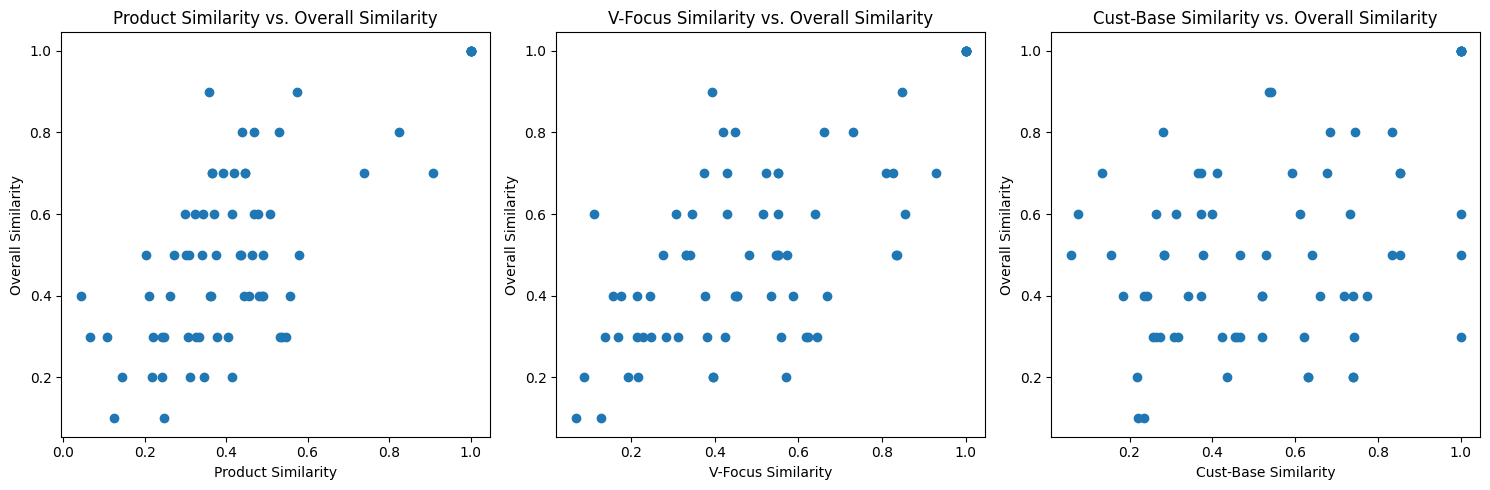

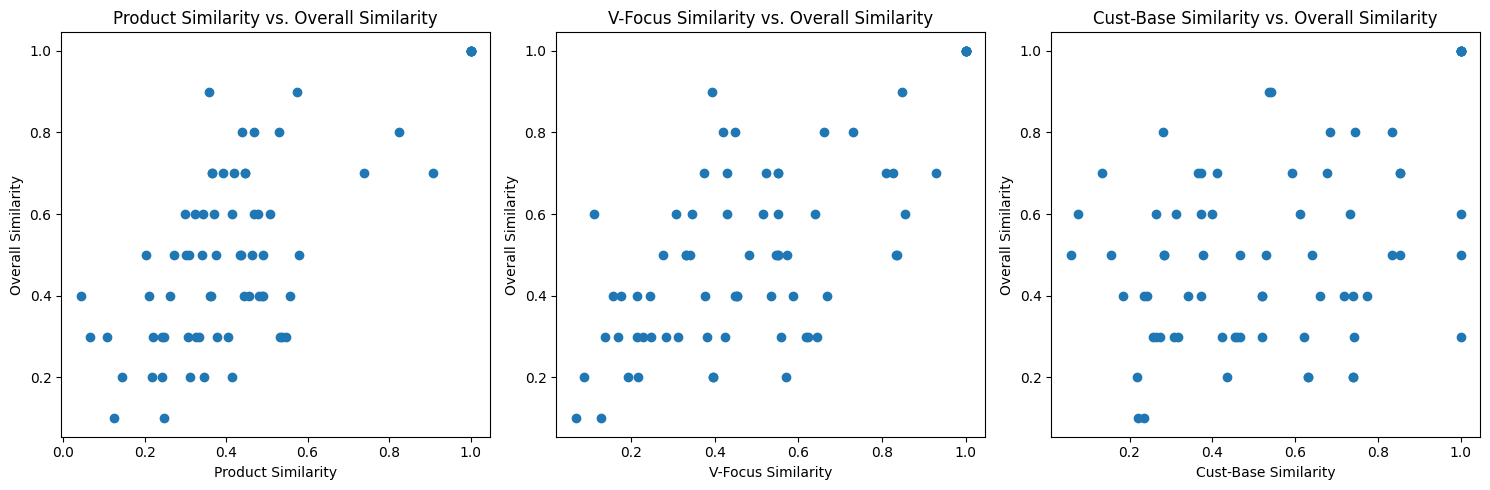

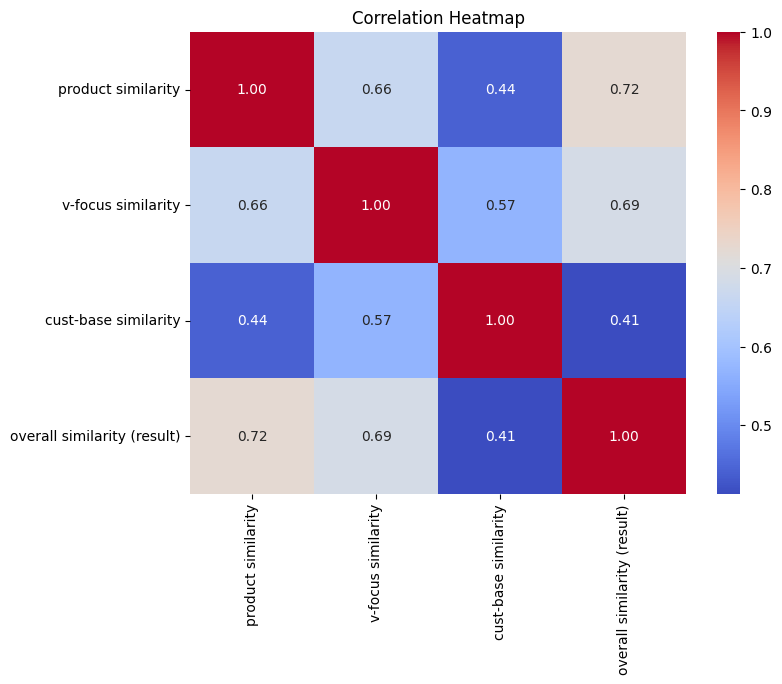

In [ ]:
import pandas as pd

# Load the DataFrame from the CSV file
df = pd.read_csv('training data - training data NLP.csv')

# Drop the 'id' column as it is non-numeric
df = df.drop(columns=['id'])

# Check the columns after dropping 'id'
print("Columns after dropping 'id':", df.columns)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Extract correlations with the target variable
correlation_with_target = correlation_matrix['overall similarity (result)']
print("\nCorrelations with the target variable:")
print(correlation_with_target)



import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots
plt.figure(figsize=(15, 5))

# Product similarity vs. Overall similarity
plt.subplot(1, 3, 1)
plt.scatter(df['product similarity'], df['overall similarity (result)'])
plt.xlabel('Product Similarity')
plt.ylabel('Overall Similarity')
plt.title('Product Similarity vs. Overall Similarity')

# V-Focus similarity vs. Overall similarity
plt.subplot(1, 3, 2)
plt.scatter(df['v-focus similarity'], df['overall similarity (result)'])
plt.xlabel('V-Focus Similarity')
plt.ylabel('Overall Similarity')
plt.title('V-Focus Similarity vs. Overall Similarity')

# Cust-Base similarity vs. Overall similarity
plt.subplot(1, 3, 3)
plt.scatter(df['cust-base similarity'], df['overall similarity (result)'])
plt.xlabel('Cust-Base Similarity')
plt.ylabel('Overall Similarity')
plt.title('Cust-Base Similarity vs. Overall Similarity')

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots
plt.figure(figsize=(15, 5))

# Product similarity vs. Overall similarity
plt.subplot(1, 3, 1)
plt.scatter(df['product similarity'], df['overall similarity (result)'])
plt.xlabel('Product Similarity')
plt.ylabel('Overall Similarity')
plt.title('Product Similarity vs. Overall Similarity')

# V-Focus similarity vs. Overall similarity
plt.subplot(1, 3, 2)
plt.scatter(df['v-focus similarity'], df['overall similarity (result)'])
plt.xlabel('V-Focus Similarity')
plt.ylabel('Overall Similarity')
plt.title('V-Focus Similarity vs. Overall Similarity')

# Cust-Base similarity vs. Overall similarity
plt.subplot(1, 3, 3)
plt.scatter(df['cust-base similarity'], df['overall similarity (result)'])
plt.xlabel('Cust-Base Similarity')
plt.ylabel('Overall Similarity')
plt.title('Cust-Base Similarity vs. Overall Similarity')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and prepare your data
df = pd.read_csv('training data - training data NLP.csv')
df = df.drop(columns=['id'])
print(df.head())

# Define features and target
X = df.drop(columns=['overall similarity (result)'])
y = df['overall similarity (result)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=8)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
print("Feature Importances:", model.feature_importances_)



   product similarity  v-focus similarity  cust-base similarity  \
0            0.307085            0.382746              0.308310   
1            0.272397            0.332723              0.284099   
2            0.823236            0.421243              0.684022   
3            0.358675            0.847312              0.541730   
4            0.345329            0.193265              0.631716   

   overall similarity (result)  
0                          0.3  
1                          0.5  
2                          0.8  
3                          0.9  
4                          0.2  
Mean Squared Error: 0.05200000000000001
Feature Importances: [0.62681982 0.24743809 0.12574209]


In [ ]:
import joblib

# Assuming 'model' is your trained tree regressor
joblib.dump(model, 'tree_regressor_model.joblib')


['tree_regressor_model.joblib']

In [ ]:
from google.colab import files

# Download the model file
files.download('tree_regressor_model.joblib')



curl -X POST http://localhost:5001/api/v1.0/students \
     -H "Content-Type: text/csv" \
     --data-binary @/Users/francescovenco/Downloads/template1.csv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2
